# The Machine Learning Landscape
Using the code on page 21 to reproduce Figure 1-19. There are some signficant changes, see https://github.com/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb for reference and details.

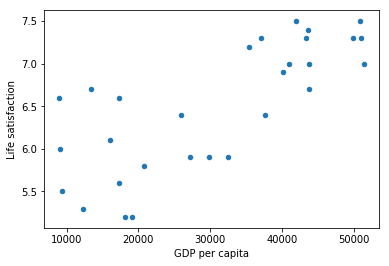

[[6.18443854]]


In [3]:
# imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
# load the data
datapath = "datasets/chapter1/oecd/"
oecd_bli = pd.read_csv(datapath+"oecd_bli_2017.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.xlw", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
# use some necessary lines from the linked notebook above
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data
# prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# visualize the data
country_stats.plot(kind='scatter',x="GDP per capita",y="Life satisfaction")
plt.show()
# select a linear model
model = sklearn.linear_model.LinearRegression()
# train the model
model.fit(X,y)
# make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[6.18443854]]

Run the above cell twice to have the figure displayed.

In [4]:
# fitting the parameters to the linear model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.295521405997438, 3.935525462329292e-05)

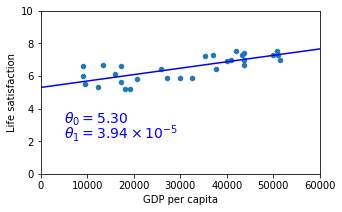

In [5]:
# showing the data and the fit 
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.30$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 3.94 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()